Decision Tree

Tiatnic Survival Dataset

In [33]:
#Import the Necessary Libraries
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
#Load the data sets- train and test 

In [35]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [38]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

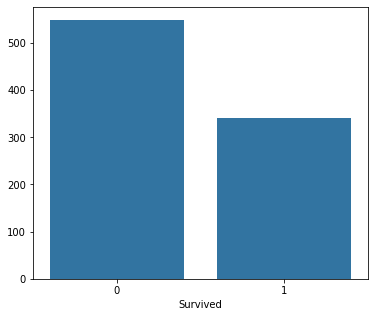

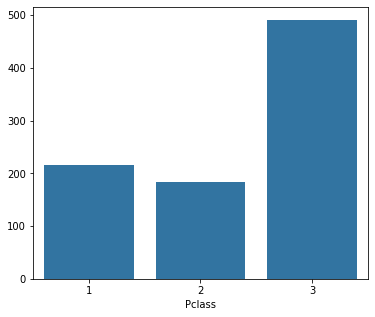

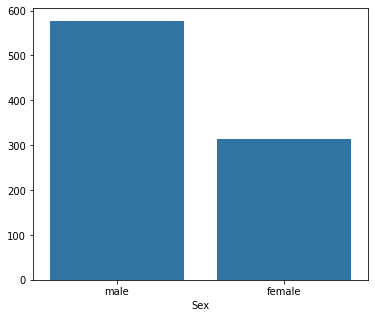

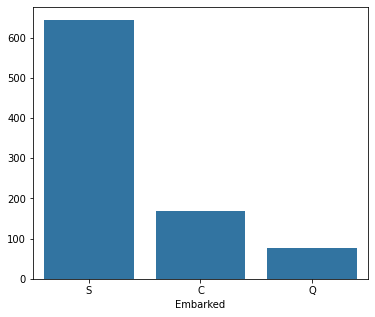

In [39]:
#Barchart of Survived, Pclass, Sex, Embarked
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Survived','Pclass','Sex','Embarked']
for col in cols:
    plt.figure(figsize=(6,5))
    sns.barplot(x=df[col].value_counts().index,y=df[col].value_counts().values)
    plt.show()

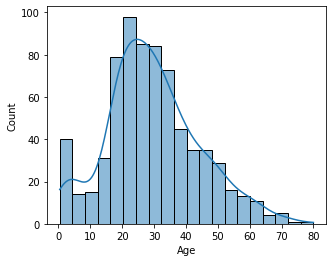

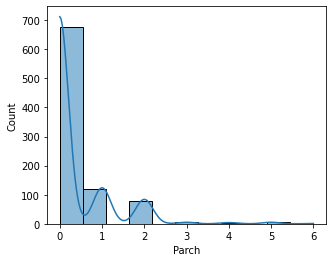

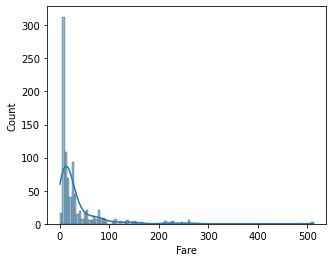

In [40]:
#Histogram of Age, Parch, Fare
cols = ['Age','Parch','Fare']

for col in cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col],kde=True)
    plt.show()

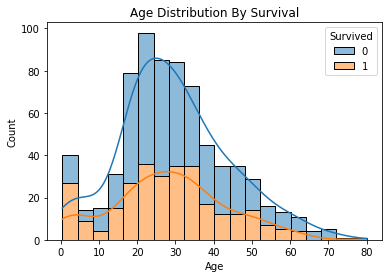

In [41]:
#Plot histogram of age for survived and did not survived class
sns.histplot(data = df , x ='Age' ,hue = 'Survived' ,kde=True , multiple = 'stack')
plt.title('Age Distribution By Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

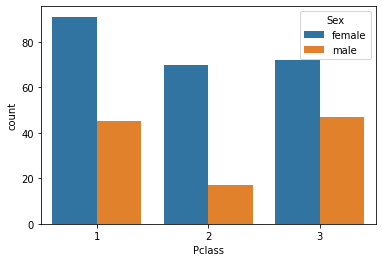

In [42]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
sur_df = df[df['Survived'] == 1]
sns.countplot(x='Pclass',hue='Sex',data = sur_df)
plt.show()

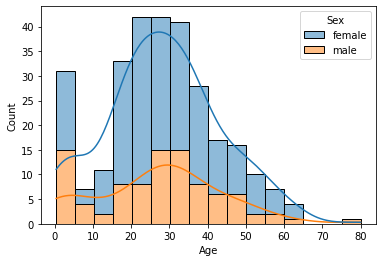

In [43]:
sns.histplot(x='Age' , hue='Sex' , data=sur_df , kde=True ,multiple='stack')
plt.show()

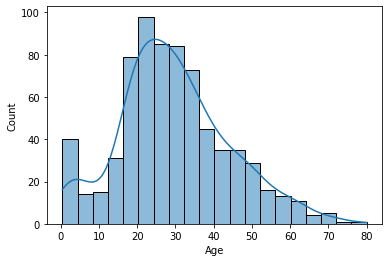

In [44]:
#Histogram of Age of the given data set(sample)

sns.histplot(df['Age'] , kde=True)
plt.show()

## Handling Missing Values

In [45]:
#Replace the msiing values in Embarked column by 'S'

#df['Embarked'].fillna('S')
df['Embarked'] =df['Embarked'].fillna('S')
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [46]:
#Impute the missing values in Fare column with median value
df['Fare'].fillna(df['Fare'].median())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [47]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np
#mean_age=df['Age'].mean()
#std_age=df['Age'].std()
#random_ages=np.random.normal(loc=mean_age,scale=std_age,size=df['Age'].isnull().sum())
#df.loc[df['Age'].isnull(),'Age']=random_ages

mean = df['Age'].mean()
std =df['Age'].std()

random_ages = np.random.normal(loc=mean , scale = std , size = df['Age'].isnull().sum())
df.loc[df['Age'].isnull(),'Age']=random_ages

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Feature Engineering - Creating new features

In [49]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [50]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone'] = df['FamilySize'] == 1

df['IsAlone']

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: IsAlone, Length: 891, dtype: bool

In [51]:
#df['Has_Cabin']=~df['Cabin'].isnull()
#df

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [52]:
df['Has_Cabin'] = ~df['Cabin'].isnull()

In [53]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(['PassengerId','Name','Ticket','Cabin'] , axis = 1 )

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_Cabin
0,0,3,male,22.000000,1,0,7.2500,S,2,False,False
1,1,1,female,38.000000,1,0,71.2833,C,2,False,True
2,1,3,female,26.000000,0,0,7.9250,S,1,True,False
3,1,1,female,35.000000,1,0,53.1000,S,2,False,True
4,0,3,male,35.000000,0,0,8.0500,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,True,False
887,1,1,female,19.000000,0,0,30.0000,S,1,True,True
888,0,3,female,21.448731,1,2,23.4500,S,4,False,False
889,1,1,male,26.000000,0,0,30.0000,C,1,True,True


## Model Building

In [54]:
#Prepare X and y

x = df.drop('Survived' , axis=1)
y = df['Survived']

In [55]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
cat = ['Sex','Embarked']
df_categorical = pd.DataFrame()

for col in cat:
    df_categorical[col] = label.fit_transform(df[col])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,True,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.448731,1,2,W./C. 6607,23.4500,NaN,S,4,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,True,True


In [66]:
# concat df_categorical with original df
df = df.drop(columns = cat , errors = 'ignore')
df = pd.concat([df,df_categorical] , axis = 1)

df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Has_Cabin,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,2,False,False,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,2,False,True,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,True,False,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,2,False,True,0,2
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,1,True,False,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,1,True,False,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,True,True,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.448731,1,2,W./C. 6607,23.4500,NaN,4,False,False,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,True,True,1,0


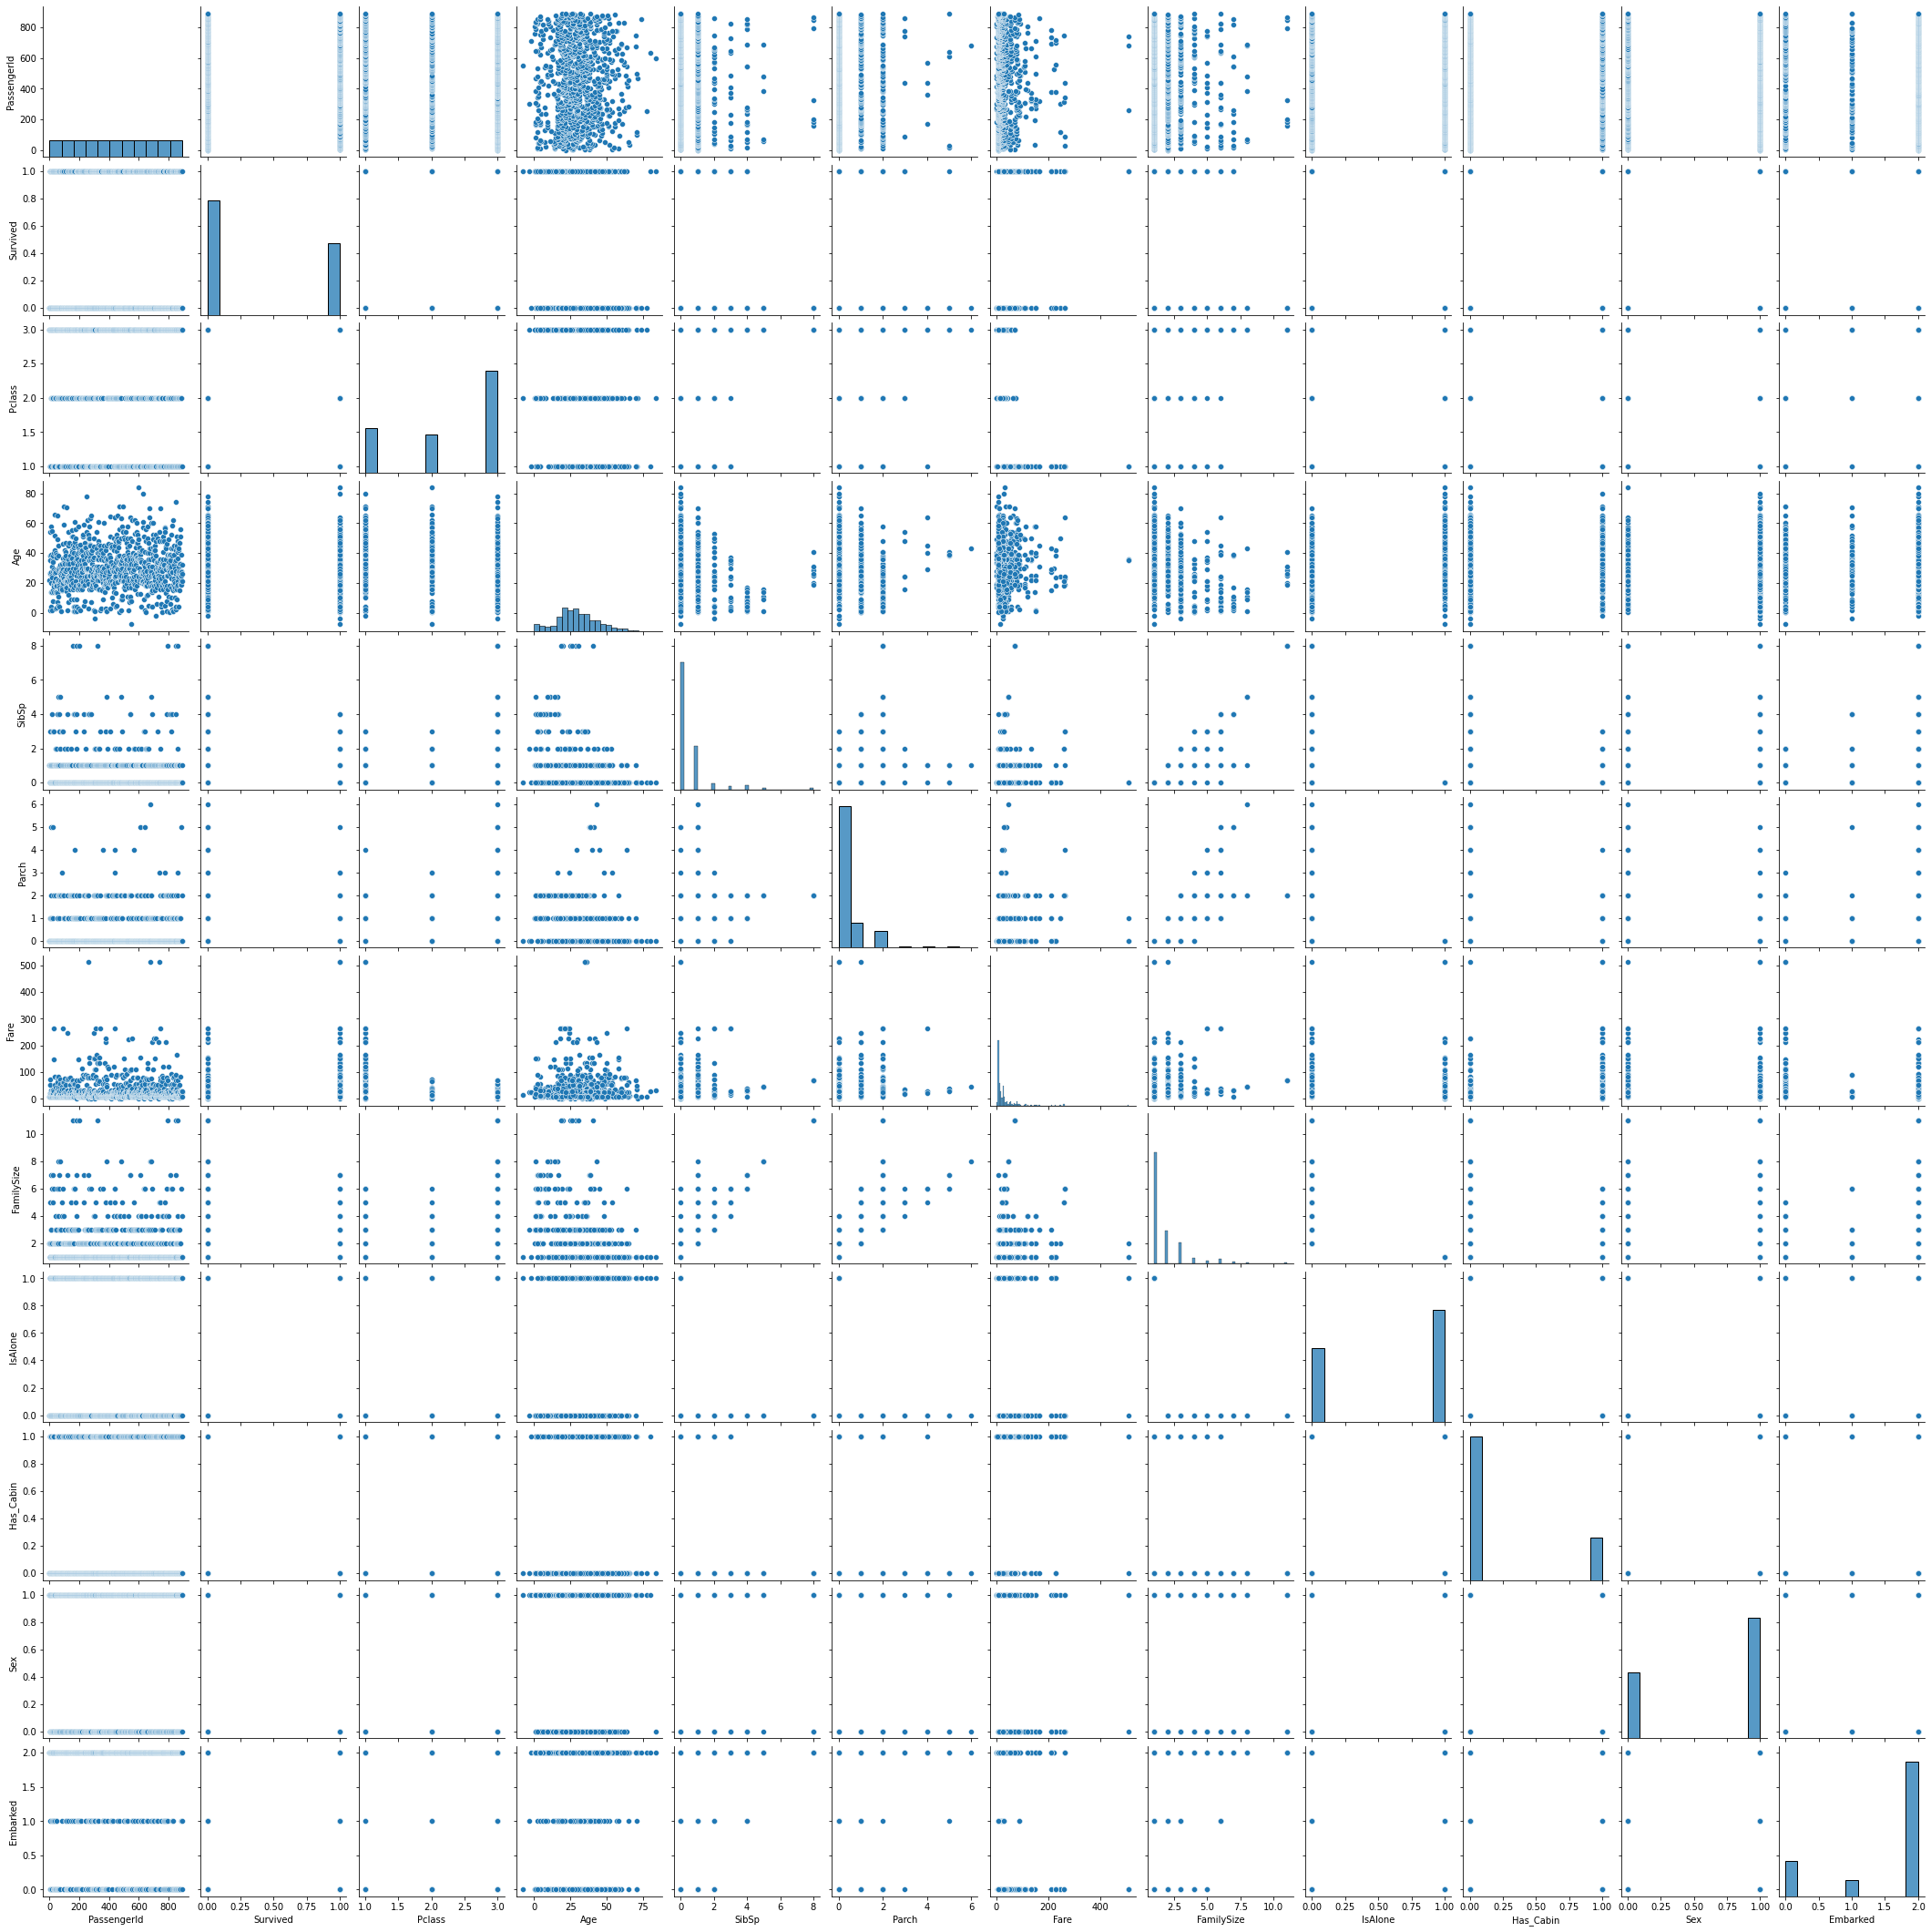

In [69]:
#Do a pairplot of all features
sns.pairplot(df)

In [81]:
x

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_Cabin,Sex,Embarked
0,3,22.000000,1,0,7.2500,2,False,False,1,2
1,1,38.000000,1,0,71.2833,2,False,True,0,0
2,3,26.000000,0,0,7.9250,1,True,False,0,2
3,1,35.000000,1,0,53.1000,2,False,True,0,2
4,3,35.000000,0,0,8.0500,1,True,False,1,2
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,True,False,1,2
887,1,19.000000,0,0,30.0000,1,True,True,0,2
888,3,21.448731,1,2,23.4500,4,False,False,0,2
889,1,26.000000,0,0,30.0000,1,True,True,1,0


In [74]:
# Drop unnecessary non-numeric columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')


In [75]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [76]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_valid = train_test_split(x,y,test_size = 0.3 , random_state=42)

In [80]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df_model = DecisionTreeClassifier(criterion='gini' , max_depth=3,random_state=42)
df_model.fit(X_train,y_train)
y_pred = df_model.predict(X_test)

print('Accuracy Score : ',accuracy_score(y_valid,y_pred))
print('Classification report: ',classification_report(y_valid,y_pred))
print('Confusion Matrix : ',confusion_matrix(y_valid,y_pred))

Accuracy Score :  0.8097014925373134
Classification report:                precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix :  [[139  18]
 [ 33  78]]


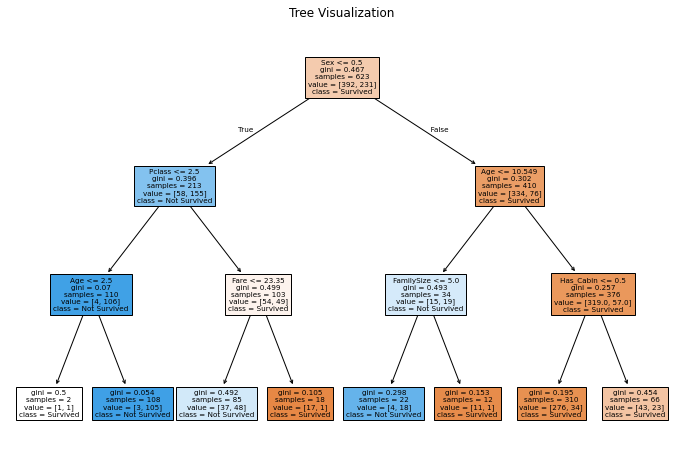

In [84]:
#Print the tree

# Importing required packages for visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(df_model, feature_names = x.columns , class_names = ['Survived','Not Survived'],filled=True)
plt.title('Tree Visualization')
plt.show()

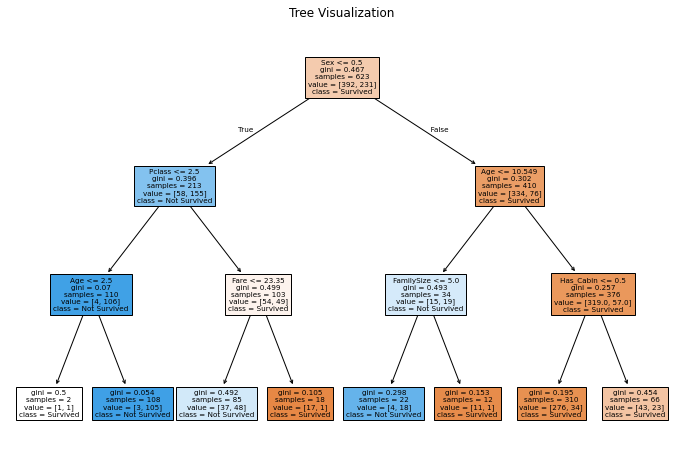

In [87]:
# plotting tree with max_depth=3
df_model = DecisionTreeClassifier(criterion='gini' , max_depth = 3,random_state = 42)
df_model.fit(X_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(df_model,feature_names=x.columns,class_names=['Survived','Not Survived'],filled=True)
plt.title('Tree Visualization')
plt.show()

<img src="tree2.png">

In [88]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

print('Accuracy Score : ',accuracy_score(y_valid,y_pred))
print('Classification report: ',classification_report(y_valid,y_pred))
print('Confusion Matrix : ',confusion_matrix(y_valid,y_pred))

Accuracy Score :  0.8097014925373134
Classification report:                precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix :  [[139  18]
 [ 33  78]]


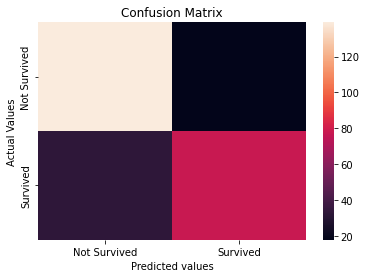

In [89]:
# Printing confusion matrix and accuracy

cm = confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()